<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/neural_networks/CNN/digit_recognition_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konwolucyjna sieć neuronowa - Handwritten digits MNIST

In [2]:
%tensorflow_version 2.x
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

TensorFlow is already loaded. Please restart the runtime to change versions.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych: ', X_train.shape[0])
print('Liczba danych testowych: ', X_test.shape[0])
print('Rozmiar pojedynczego obrazka: ', X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych:  60000
Liczba danych testowych:  10000
Rozmiar pojedynczego obrazka:  (28, 28)


(-0.5, 27.5, 27.5, -0.5)

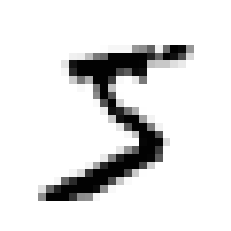

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

In [7]:
print(keras.backend.image_data_format())

channels_last


In [6]:
img_rows, img_cols = 28, 28
if keras.backend.image_data_format() == 'channel_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

print(input_shape)

channels_last
(28, 28, 1)


In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [10]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Budowa modelu

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

In [15]:
model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 20s 329us/step - loss: 0.1929 - acc: 0.9401 - val_loss: 0.0489 - val_acc: 0.9841
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0463 - acc: 0.9858 - val_loss: 0.0406 - val_acc: 0.9862
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0296 - acc: 0.9907 - val_loss: 0.0329 - val_acc: 0.9876
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0197 - acc: 0.9939 - val_loss: 0.0342 - val_acc: 0.9874
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0137 - acc: 0.9955 - val_loss: 0.0300 - val_acc: 0.9894
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0090 - acc: 0.9973 - val_loss: 0.0312 - val_acc: 0.9905
Epoch 7/20
60000/60000 [

In [0]:
def make_accuracy_plot(history):
  """
  Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym i walidacyjnym.
  """
  acc, val_acc = history.history['acc'], history.history['val_acc']
  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(10, 8))
  plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
  plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
  plt.legend()
  plt.title('Dokładność trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Dokładność')
  plt.show()

def make_loss_plot(history):
  """
  Funkcja zwraca wykres starty (loss) modelu na zbiorze treningowym i walidacyjnym.
  """
  loss, val_loss = history.history['loss'], history.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure(figsize=(10, 8))
  plt.plot(epochs, loss, label='Strata trenowania', marker='o')
  plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
  plt.legend()
  plt.title('Strata trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Strata')
  plt.show()

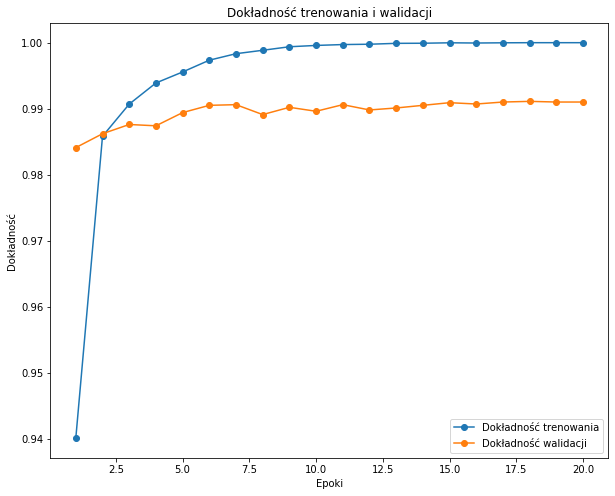

In [20]:
make_accuracy_plot(history)

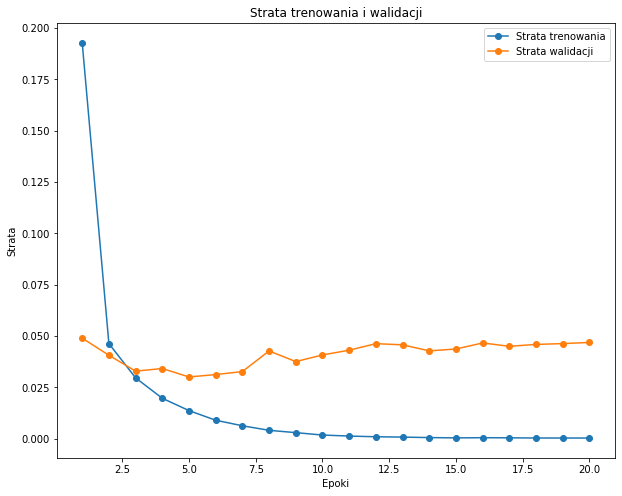

In [21]:
make_loss_plot(history)

In [22]:
history = model.fit(X_train, y_train, batch_size=128, epochs=4, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 6s 93us/step - loss: 2.8337e-04 - acc: 1.0000 - val_loss: 0.0475 - val_acc: 0.9912
Epoch 2/4
60000/60000 [==============================] - 6s 93us/step - loss: 2.8151e-04 - acc: 1.0000 - val_loss: 0.0480 - val_acc: 0.9912
Epoch 3/4
60000/60000 [==============================] - 6s 92us/step - loss: 2.8038e-04 - acc: 1.0000 - val_loss: 0.0483 - val_acc: 0.9911
Epoch 4/4
60000/60000 [==============================] - 6s 93us/step - loss: 2.7929e-04 - acc: 1.0000 - val_loss: 0.0485 - val_acc: 0.9910


### Ocena modelu

In [23]:
model.evaluate(X_test, y_test, verbose=2)

[0.048517063275024495, 0.991]

In [25]:
import pandas as pd

metrics = pd.DataFrame(history.history)
metrics

,val_loss,val_acc,loss,acc
0,0.047536,0.9912,0.000283,0.999983
1,0.048037,0.9912,0.000282,0.999983
2,0.048251,0.9911,0.000280,0.999983
3,0.048517,0.9910,0.000279,0.999983
